In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('GBPUSD_historical_data.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,09/09/2022 00:00,1.15022,1.16478,1.14969,1.15865,84.3,0.73
1,09/08/2022 00:00,1.15183,1.15602,1.14600,1.15021,-16.2,-0.14
2,09/07/2022 00:00,1.15176,1.15392,1.14048,1.15360,18.4,0.16
3,09/06/2022 00:00,1.15140,1.16094,1.14936,1.15197,5.7,0.05
4,09/05/2022 00:00,1.14768,1.15217,1.14433,1.15217,44.9,0.39


In [3]:
#STATISTICS FOR GBPUSD HISTORICAL
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          440 non-null    object 
 1   Open          440 non-null    float64
 2   High          440 non-null    float64
 3   Low           440 non-null    float64
 4   Close         440 non-null    float64
 5   Change(Pips)  440 non-null    float64
 6   Change(%)     440 non-null    float64
dtypes: float64(6), object(1)
memory usage: 24.2+ KB


In [4]:
# REMOVE TIME ON THE DATE COLUMN
df['Date'].str.strip("00:00")

0      9/09/2022 
1      9/08/2022 
2      9/07/2022 
3      9/06/2022 
4      9/05/2022 
          ...    
435    1/08/2021 
436    1/07/2021 
437    1/06/2021 
438    1/05/2021 
439    1/04/2021 
Name: Date, Length: 440, dtype: object

In [5]:
# SAVE CHANGES ON THE DATE
df['Date']=df['Date'].str.strip("00:00")
df

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,9/09/2022,1.15022,1.16478,1.14969,1.15865,84.3,0.73
1,9/08/2022,1.15183,1.15602,1.14600,1.15021,-16.2,-0.14
2,9/07/2022,1.15176,1.15392,1.14048,1.15360,18.4,0.16
3,9/06/2022,1.15140,1.16094,1.14936,1.15197,5.7,0.05
4,9/05/2022,1.14768,1.15217,1.14433,1.15217,44.9,0.39
...,...,...,...,...,...,...,...
435,1/08/2021,1.35612,1.36355,1.35381,1.35603,-0.9,-0.01
436,1/07/2021,1.36063,1.36330,1.35323,1.35639,-42.4,-0.31
437,1/06/2021,1.36240,1.36710,1.35387,1.36071,-16.9,-0.12
438,1/05/2021,1.35662,1.36419,1.35539,1.36272,61.0,0.45


# What is the change in price over time

<AxesSubplot:xlabel='Date'>

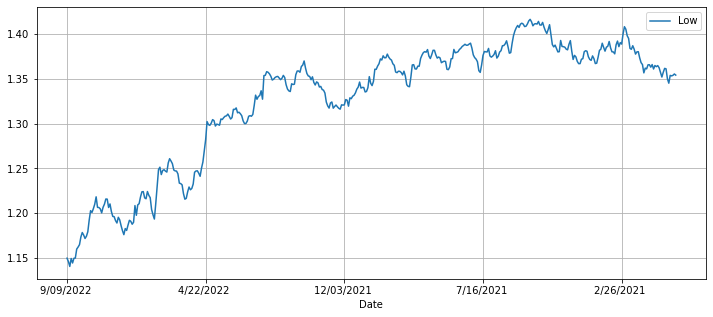

In [6]:
#Using pandas and matplotlib we can plot the GBPUSD Low Price
df.plot(kind='line', x="Date", y="Low",grid= True, figsize=(12,5))

<AxesSubplot:xlabel='Date'>

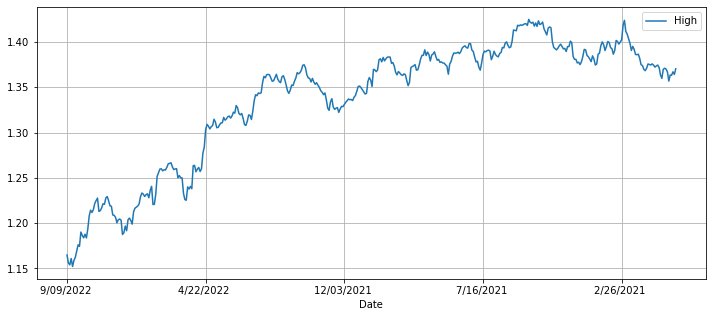

In [7]:
#Using pandas and matplotlib we can plot the GBPUSD High Price
df.plot(kind='line', x="Date", y="High",grid= True, figsize=(12,5))

<AxesSubplot:>

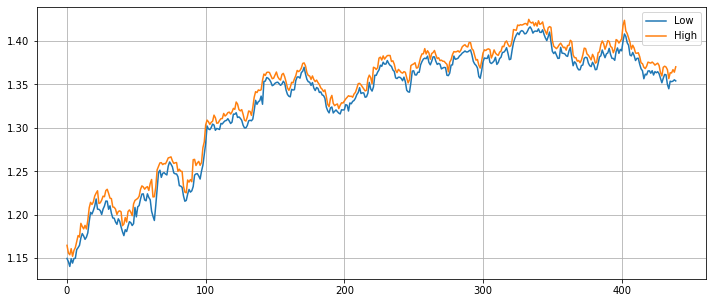

In [8]:
#Using pandas and matplotlib we can plot Both the Low and High Price of Gbpusd
df[['Low','High',]].plot(kind='line',figsize=(12,5),grid = True)

<AxesSubplot:>

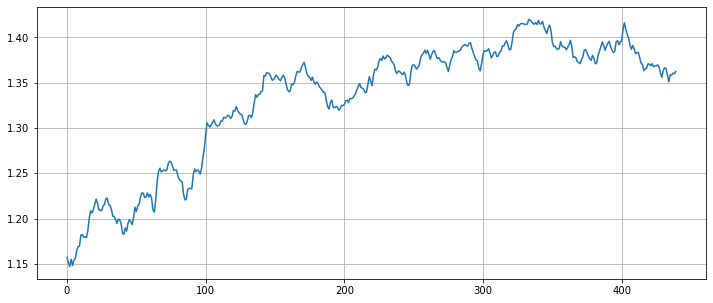

In [9]:
# we can plot the Mean between High and low price
c=df[['Low','High',]].mean(axis=1)
c.plot(kind='line',figsize=(12,5),grid = True)

# Linear Regression

In [10]:
df.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,9/09/2022,1.15022,1.16478,1.14969,1.15865,84.3,0.73
1,9/08/2022,1.15183,1.15602,1.14600,1.15021,-16.2,-0.14
2,9/07/2022,1.15176,1.15392,1.14048,1.15360,18.4,0.16
3,9/06/2022,1.15140,1.16094,1.14936,1.15197,5.7,0.05
4,9/05/2022,1.14768,1.15217,1.14433,1.15217,44.9,0.39


In [11]:
# importing datetime module
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
# Using toordinal() to generate ordinal value.
df['Date']=df['Date'].map(dt.datetime.toordinal)

In [12]:
df['Date']

0      738407
1      738406
2      738405
3      738404
4      738403
        ...  
435    737798
436    737797
437    737796
438    737795
439    737794
Name: Date, Length: 440, dtype: int64

In [13]:
X=df['Date']
X=np.array(X).reshape(-1,1)
X.shape

(440, 1)

In [14]:
y=df['Low']
y.shape

(440,)

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, train_size=0.7, random_state=88, shuffle=False)

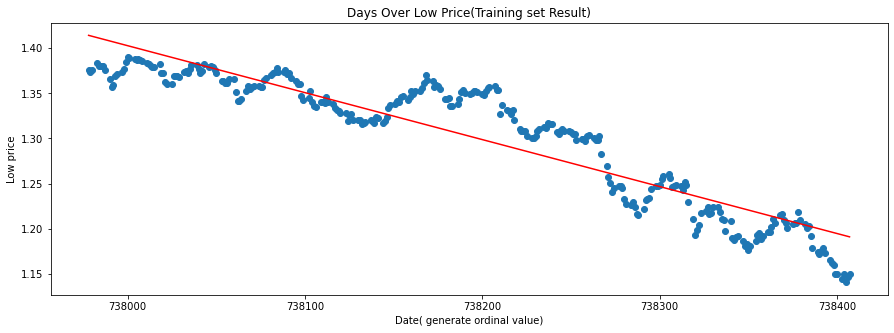

In [16]:
from sklearn.linear_model import LinearRegression

#let create the model object using LinearRegression
model = LinearRegression()

# Fit our model to our input data x and y
model.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = model.predict(X_train)

# Plot outputs
plt.figure(figsize=(15,5))
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color ='r')
plt.title('Days Over Low Price(Training set Result)')
plt.xlabel('Date( generate ordinal value)')
plt.ylabel("Low price")
plt.show()

In [17]:
model.score(X_train, y_train) #check score

0.8544504397980952

In [18]:
print ('Coefficient: \n', model.coef_)# Coeffifient
print ('Intercept: \n', model.intercept_)# Intercept 

Coefficient: 
 [-0.00052042]
Intercept: 
 385.47265286129533
